#Projekt Grupy 4 - Dengue

## Cele projektu

Celem tego zadania jest proba wykorzystania modeli Regresji Liniowej i Klasyfikacji biblioteki Sci-Kit Learn do przewidzenia przyszlych przypadkow zachorowan na podstawnie posiadanych danych ze stacji meteorologicznych.

Regresja limniowa posluzy za oszacowanie ilosci strwqierdzoncyh przypadkow 'cases' (wspolczynnik zalezny) w oparciu o jeden lub wiecej wspolczynnikow niezaleznych (dane meteorologiczne).

Klasyfikacja ma sluzyc do nadania etykiety [malo, umiarkowanie, duzo] na podstawie czynnikow wejsciowych
 
* Regresja <br>
Dążenie do przewidzenia dokładnej liczby przypadków przy użyciu warunków środowiskowych i pogodowych.
* Klasyfikacja <br>
Klasyfikacja liczby przypadków na kategorie (np. niska, średnia, wysoka dotkliwość) przy użyciu kategorycznej etykiety dostarczonej w zbiorze danych.

## 1. Przegląd zestawu danych

W pliku 'dengua.csv' znajduja sie dane opisujace ilosc przypadkow 'cases' goraczki Denga i wystepujacych w dniu badania czynnikow atmosferycznych, odczuwalnych, kategorii i ilosci przypadkow. Zbiór danych składa się z 602 obserwacji i 26 kolumn.  <br>

 'serial' - nr pozadkowy,<br>
 'tempmax' - temp zmierzona maksymalna [C],<br>
 'tempmin' - temp zmierzona minimalna [C],<br>
 'temp' - temp zmierzona srednia [C],<br>
 'feelslikemax' - temp odczuwalna maksymalna [C],<br>
 'feelslikemin' - temp odczuwalna minimalna [C],<br>
 'feelslike' - temp odczuwalna Srednia [C],<br>
 'dew' - rosa,<br>
 'humidity' - wilgotnosc,<br>
 'precip' - opady,<br>
 'precipprob' - prawdopodobienstwo wystapienia opadow,<br>
 'precipcover' - procentowy czas trwania opadow,<br>
 'snow' - snieg,<br>
 'snowdepth' - grubos pokrywy sknieznej,<br>
 'windspeed' - predkosc wiatru,<br>
 'winddir' - kierunek wiatru,<br>
 'sealevelpressure' - cisnienie atmosferyczne zredukowane do poziomu morza,<br>
 'cloudcover' - stopien zachmurzenia,<br>
 'visibility' - widocznosc,<br>
 'solarradiation' - promieniowanie sloneczne,<br>
 'solarenergy' - ilosc enbergii slonecznej,<br>
 'uvindex' - index UV (untrafiolet),<br>
 'conditions' - warunki ,<br>
 'stations' - stacje,<br>
 'cases' - przypadki,<br>
 'labels' - etykiety<br>




#### Wprowadzenie do problemu
Dane zawarte w pliku dengue.csv mogą być użyte do analizy zależności między czynnikami środowiskowymi a liczbą przypadków choroby, takiej jak denga. Denga to wirusowa choroba przenoszona przez komary, której rozprzestrzenianie może być silnie uzależnione od różnych czynników środowiskowych, takich jak temperatura, wilgotność czy opady. Badanie tych zależności jest kluczowe dla zrozumienia, jakie warunki sprzyjają występowaniu epidemii dengi, co z kolei może pomóc w przewidywaniu i zarządzaniu rozprzestrzenianiem się choroby. 
#### Potencjalne zastosowania
Analiza tego zbioru danych pozwala na identyfikację czynników środowiskowych, które mają największy wpływ na występowanie dengi. Może to prowadzić do opracowania modeli predykcyjnych, które mogą prognozować liczbę przypadków choroby na podstawie warunków pogodowych. Takie modele mogą być wykorzystywane do wczesnego ostrzegania przed możliwymi epidemiami i do planowania odpowiednich działań prewencyjnych.

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

Ładowanie danych z pliku do Pandas DataFrame

In [170]:
#Ładowanie danych do Pandas DataFrame
data = pd.read_csv(r'dengue.csv')

## 2. Eksploracja i wstępne przetwarzanie danych

In [171]:
# data.columns.tolist()
# analiza statystyczna danych w kolumnach
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial            602 non-null    int64  
 1   tempmax           602 non-null    float64
 2   tempmin           602 non-null    float64
 3   temp              602 non-null    float64
 4   feelslikemax      602 non-null    float64
 5   feelslikemin      602 non-null    float64
 6   feelslike         602 non-null    float64
 7   dew               602 non-null    float64
 8   humidity          602 non-null    float64
 9   precip            602 non-null    float64
 10  precipprob        602 non-null    float64
 11  precipcover       602 non-null    float64
 12  snow              602 non-null    float64
 13  snowdepth         602 non-null    float64
 14  windspeed         602 non-null    float64
 15  winddir           602 non-null    float64
 16  sealevelpressure  602 non-null    float64
 1

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,...,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,...,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,...,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,...,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,...,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,...,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000
max,601.000000,41.200000,29.400000,33.300000,49.600000,37.900000,42.900000,28.100000,99.300000,302.000000,...,359.200000,1020.000000,97.900000,24.033333,318.500000,27.700000,10.000000,4.000000,5.000000,24983.000000


In [172]:
# sprawdzenie typow danych w kolumnach
data.dtypes

serial                int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
cases               float64
labels               object
dtype: object

In [173]:
# sprawdzanbie wartosci NA/NaN
data.isna().sum()

serial              0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
stations            0
cases               0
labels              0
dtype: int64

In [174]:
# poglad na dane
data.head(10)

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal
5,5,28.279675,20.695122,23.818699,29.506504,20.695122,24.056098,19.927642,80.494309,4.219911,...,0.000000,59.769919,7.062602,195.847967,16.925203,7.008130,0.853659,0.983740,9669.0,normal
6,6,32.060163,25.723577,28.496748,38.978049,27.621951,33.214634,24.824390,81.698374,6.349325,...,1003.519512,57.928455,3.264228,196.900000,17.007317,6.788618,1.447154,0.000000,6772.0,normal
7,7,34.237398,26.526016,29.847967,41.382114,28.377236,34.901626,24.558537,74.819512,8.959569,...,1008.212195,56.070732,6.056098,169.027642,14.573171,5.967480,0.544715,1.869919,10342.0,normal
8,8,34.460976,23.867480,28.787805,39.463415,24.445528,32.002439,21.492683,67.514634,4.517886,...,1003.942276,29.597561,2.595122,238.502439,20.600813,7.731707,1.756098,1.000000,12542.0,normal
9,9,30.769106,23.066667,26.313821,36.357724,23.066667,28.114634,24.065854,88.390244,11.597561,...,1010.143089,78.597561,3.722764,208.988618,18.047967,7.382114,2.422764,0.764228,150.0,normal


In [175]:
zero_adjust = data['sealevelpressure'].mean()
data[data['sealevelpressure']==0]['sealevelpressure']
data.iloc[5,16] = zero_adjust

In [176]:
data.head(10)

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal
5,5,28.279675,20.695122,23.818699,29.506504,20.695122,24.056098,19.927642,80.494309,4.219911,...,1004.690531,59.769919,7.062602,195.847967,16.925203,7.008130,0.853659,0.983740,9669.0,normal
6,6,32.060163,25.723577,28.496748,38.978049,27.621951,33.214634,24.824390,81.698374,6.349325,...,1003.519512,57.928455,3.264228,196.900000,17.007317,6.788618,1.447154,0.000000,6772.0,normal
7,7,34.237398,26.526016,29.847967,41.382114,28.377236,34.901626,24.558537,74.819512,8.959569,...,1008.212195,56.070732,6.056098,169.027642,14.573171,5.967480,0.544715,1.869919,10342.0,normal
8,8,34.460976,23.867480,28.787805,39.463415,24.445528,32.002439,21.492683,67.514634,4.517886,...,1003.942276,29.597561,2.595122,238.502439,20.600813,7.731707,1.756098,1.000000,12542.0,normal
9,9,30.769106,23.066667,26.313821,36.357724,23.066667,28.114634,24.065854,88.390244,11.597561,...,1010.143089,78.597561,3.722764,208.988618,18.047967,7.382114,2.422764,0.764228,150.0,normal


In [177]:
# usuwanie zbednych kolumn ['serial','feelslikemax','feelslikemin','feelslike'] i pustych kolumn ['snow','snowdepth'] 
data.drop(columns=['serial','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','snow','snowdepth', 'winddir'], inplace=True)

In [178]:
# zaokraglanie do 3mpp
data = data.round(3)
data['conditions'] = data['conditions'].round(0).astype(int)
data['stations'] = data['stations'].round(0).astype(int)

In [179]:
# konwersja liczby prtzypadkow do INT
data['cases'] = data['cases'].astype(int)

In [180]:
# podglad danych
data.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal


In [181]:
# macierz korelacji, usuwanie 'labels' bo macierz operuje na liczbach
correlation_matrix = data.drop(columns='labels').corr()

<Axes: >

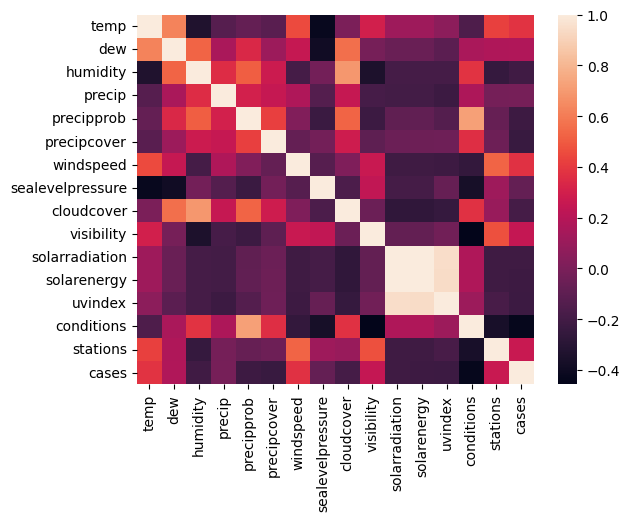

In [182]:
#wizualizacja macierzy korelacji
sns.heatmap(correlation_matrix)

In [183]:
#przygotowanie listy kolumna dla petli FOR
columns = data.drop(columns=['labels','cases']).columns.values
columns

array(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'stations'], dtype=object)

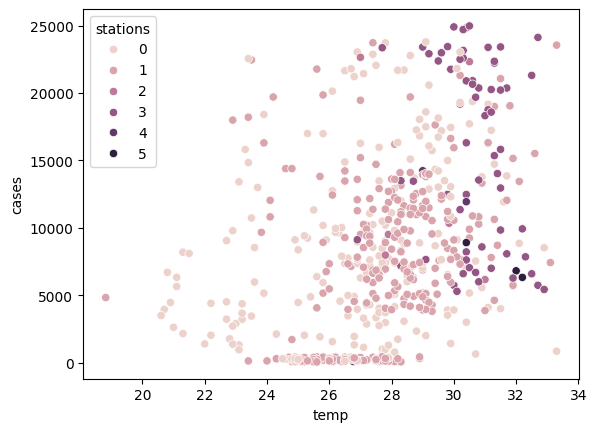

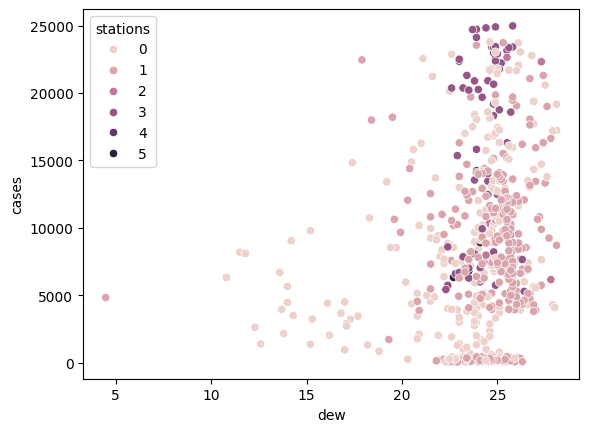

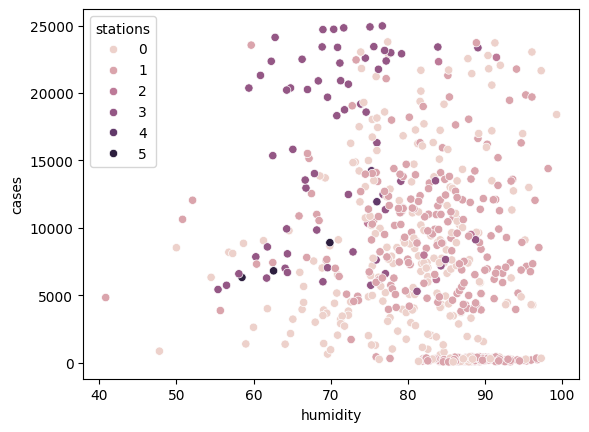

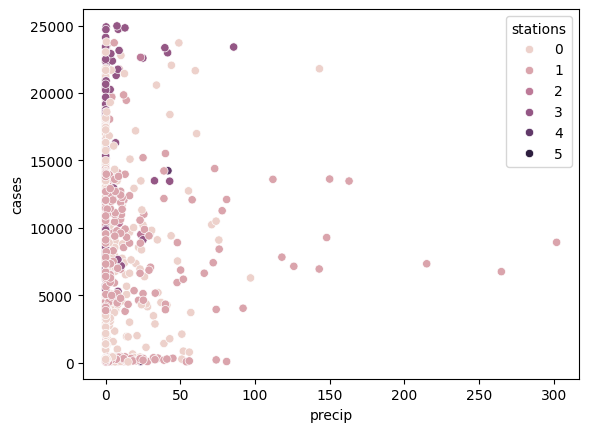

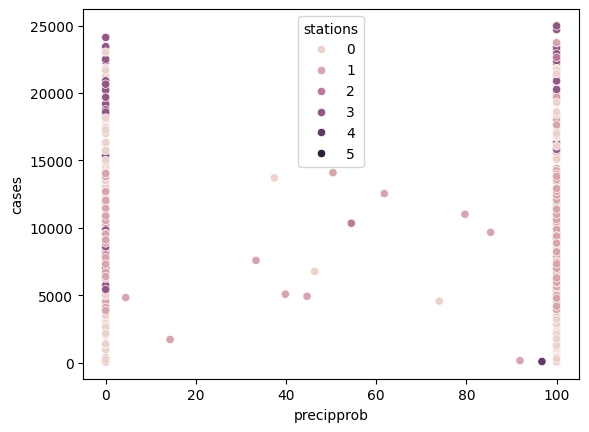

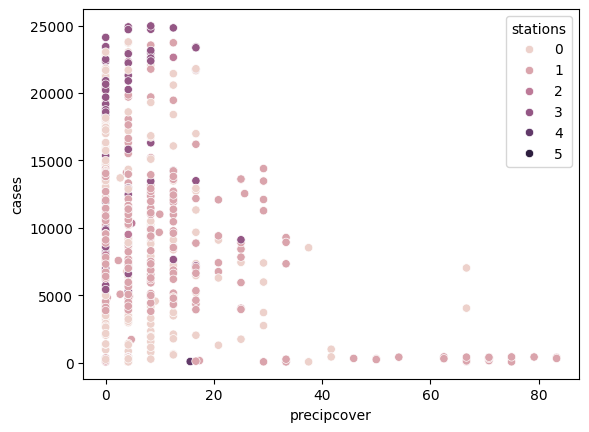

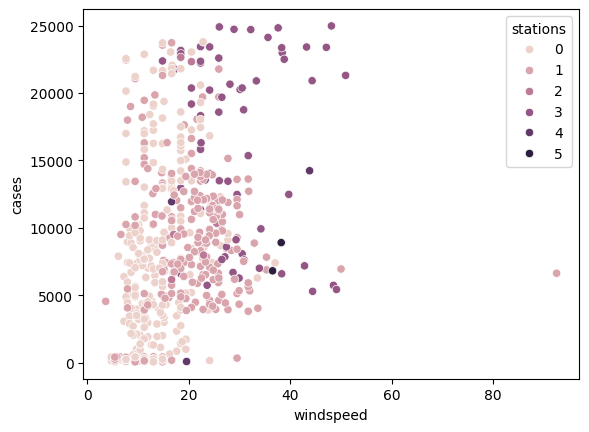

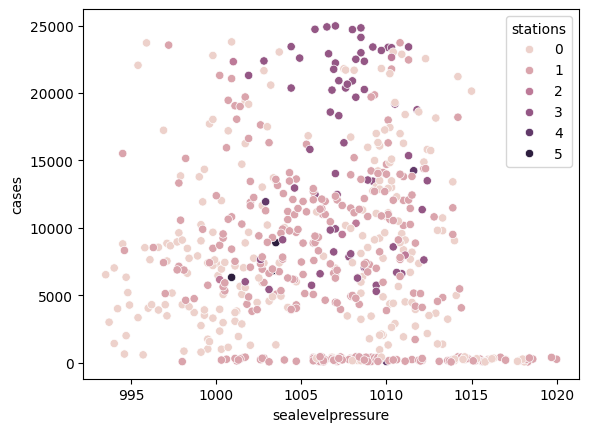

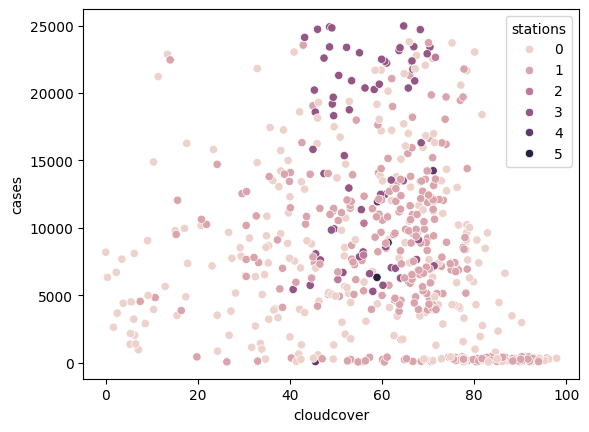

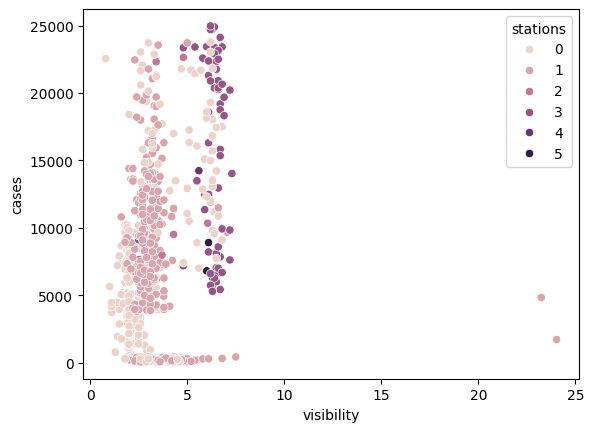

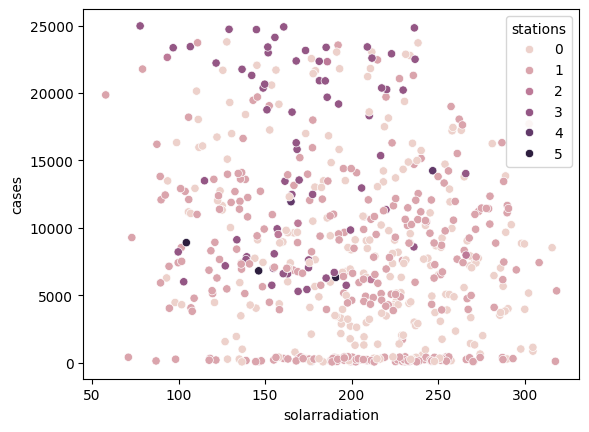

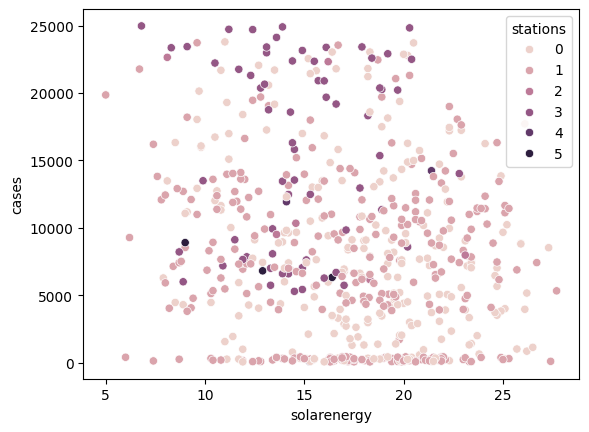

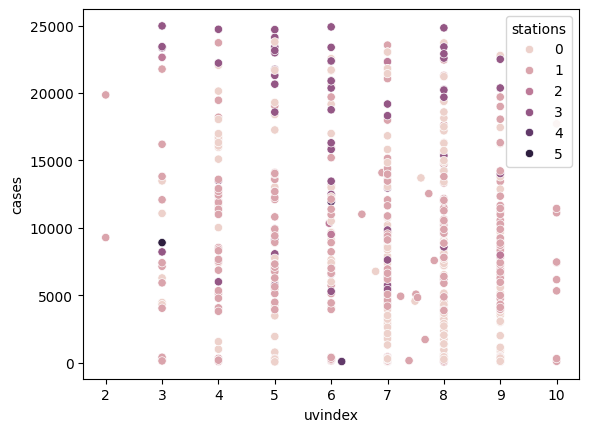

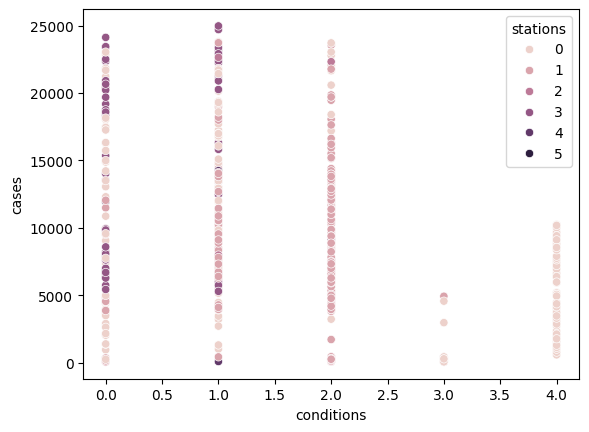

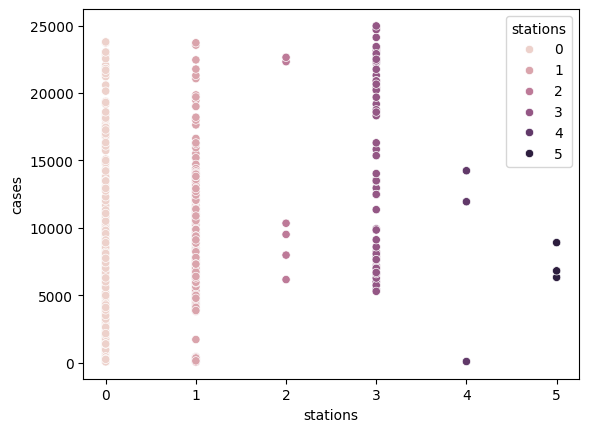

In [184]:


# for column in columns:
#     fig, ax = plt.subplots()
#     ax.scatter(x = data[column], y = data['cases'] )
#     plt.xlabel(column)
#     plt.ylabel('Cases')
#     plt.legend()
# plt.show() 

for column in columns:
    sns.scatterplot(x = data[column], y = data['cases'], hue=data['stations'])
    plt.show()
 



In [185]:
# plt.boxplot(data['temp'])
# plt.show()

# def box_plot_iterate(input_data, input_column):
#     input_data.boxplot(column=input_column)
#     plt.legend(column)


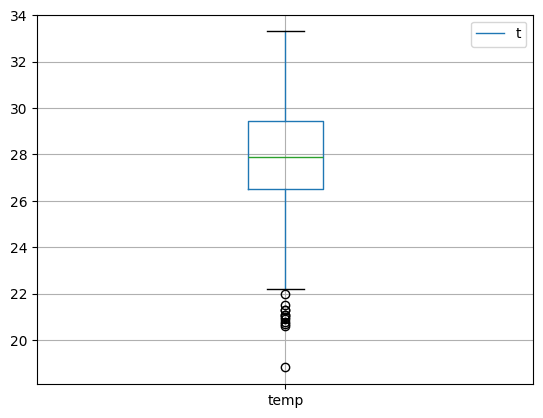

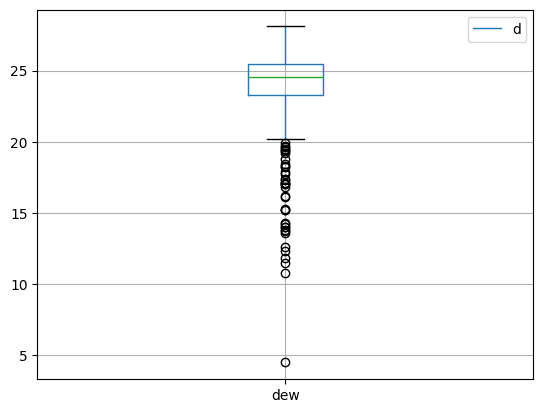

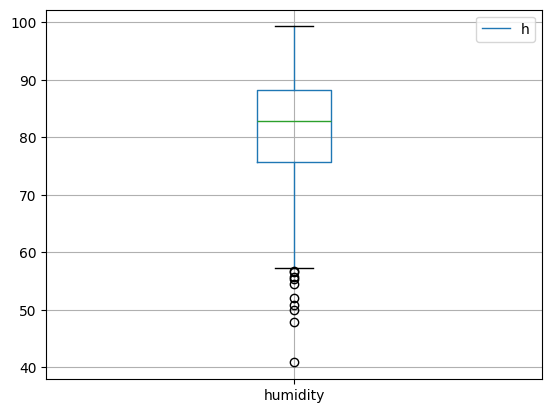

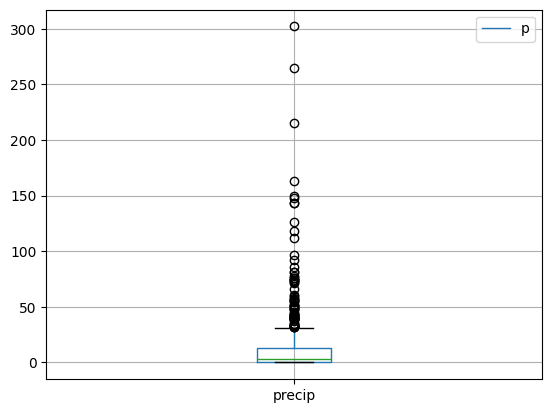

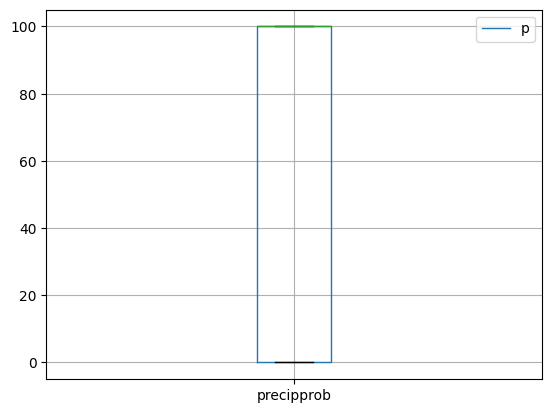

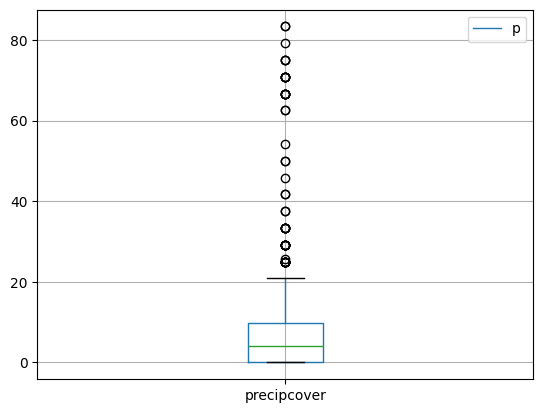

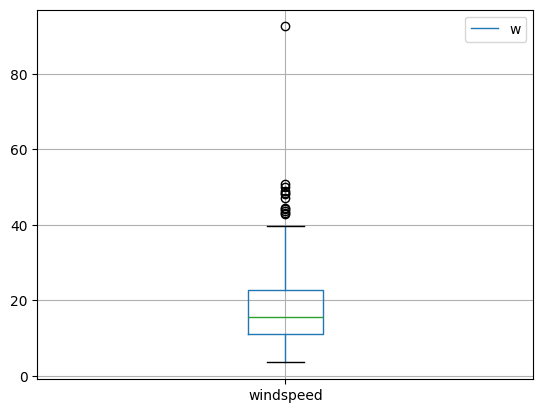

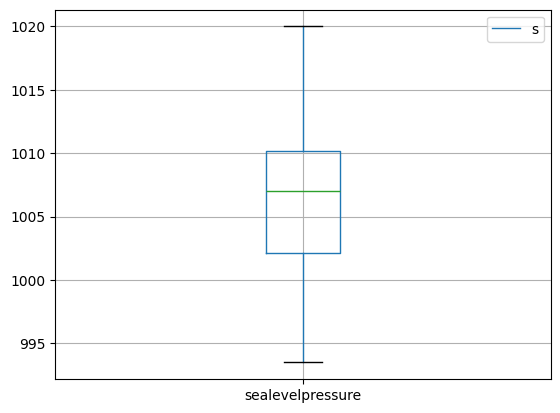

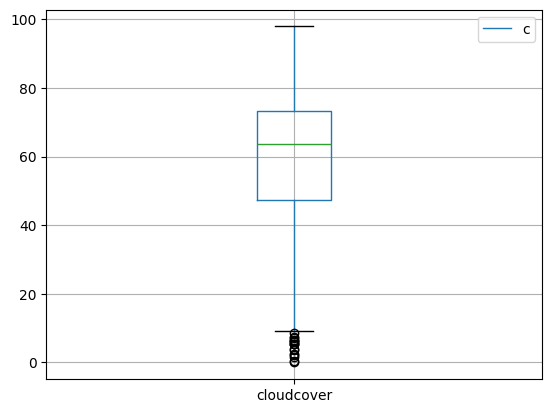

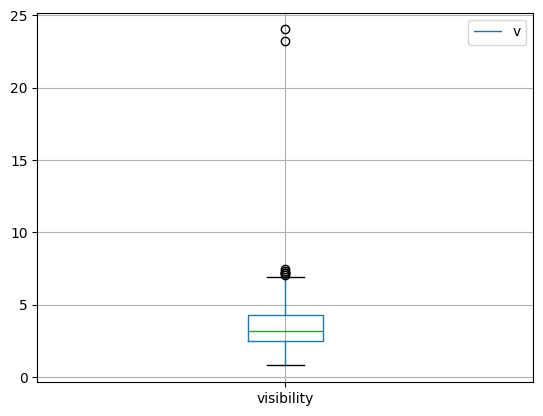

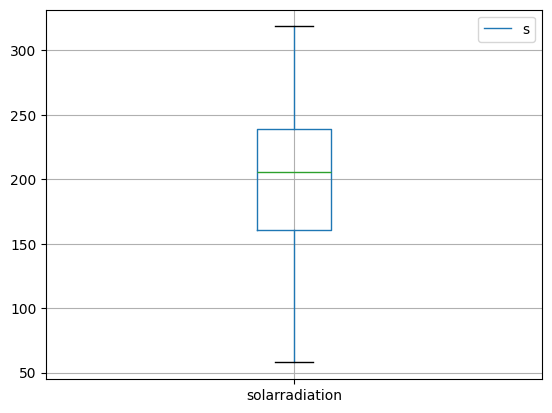

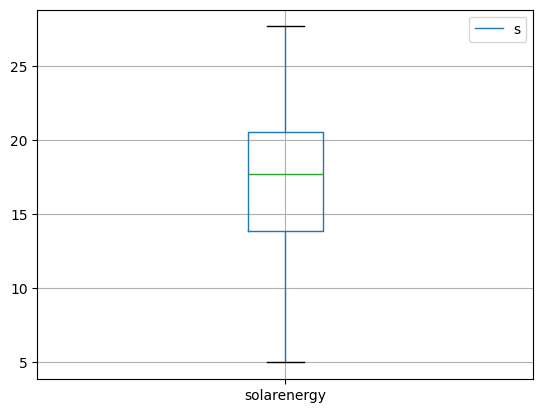

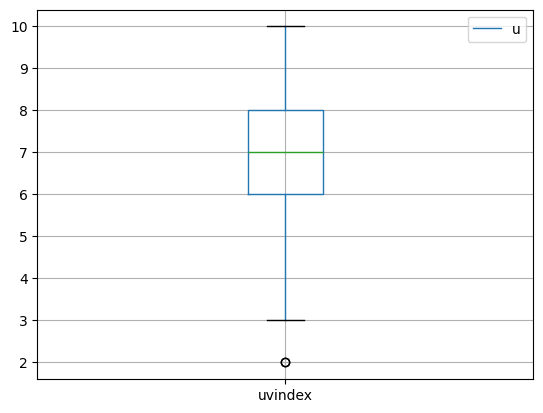

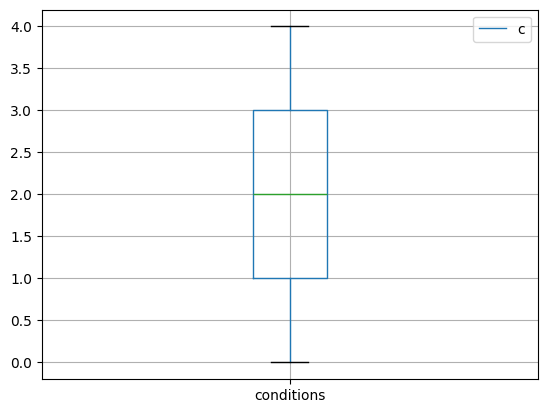

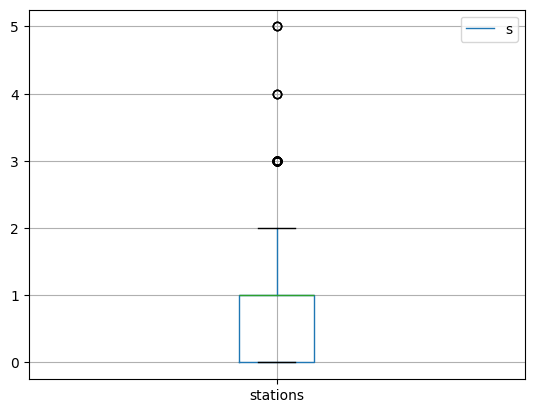

In [186]:
# sprwdzenie odstajacyh danych

for column in columns:

    data.boxplot(column= column)
    plt.legend(column)
    # plt.
    plt.show()
 

In [187]:
# for column in columns:

#     data.boxplot(column= column)
#     plt.legend(column)
#     # plt.
#     plt.show()
columns = data.drop(columns=['labels','cases']).columns.values
columns = columns.tolist()

 

In [188]:

type(columns)
columns.pop(-1) #exclude stations

to_remove = []
for column in columns:
    s = data[column].std()
    # print(column,data[(data[column] < data[column].mean() - 3 * s) | (data[column] > (data[column].mean() + 3 * s))].index.to_list())
    for index in data[(data[column] < data[column].mean() - 3 * s) | (data[column] > (data[column].mean() + 3 * s))].index.to_list():
        to_remove.append(index)
        # print(index)
to_remove = set(to_remove)

# rows to remove
len(to_remove)

59

In [189]:
data.drop(to_remove, inplace=True)

In [190]:
data.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal


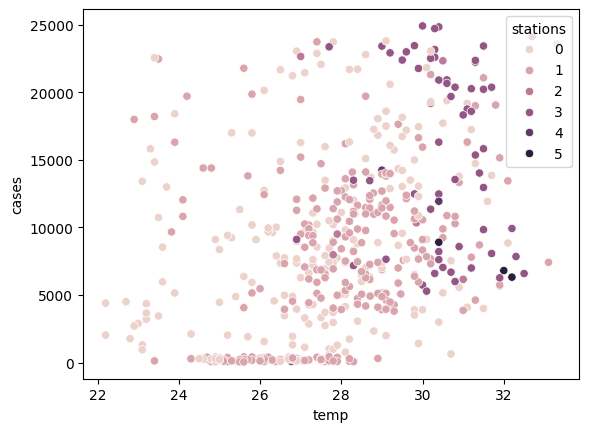

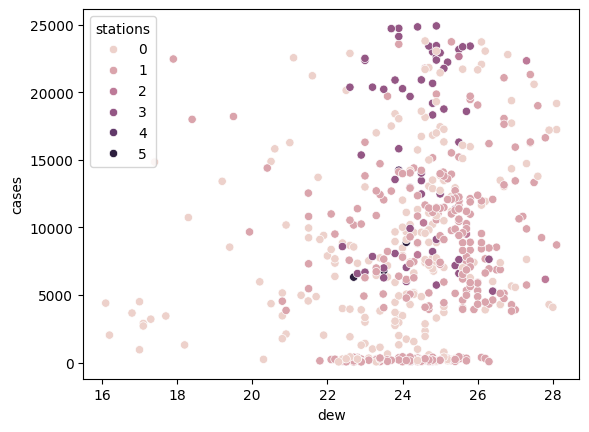

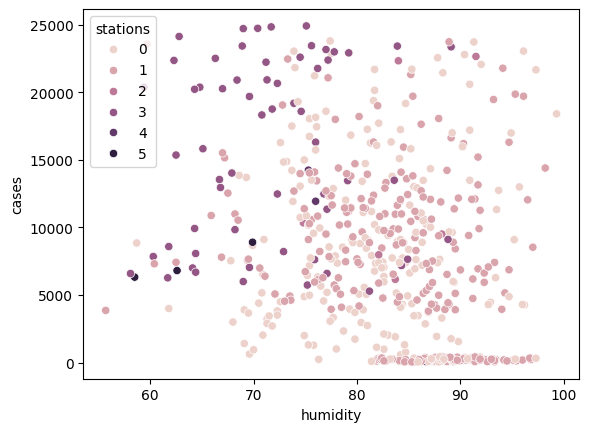

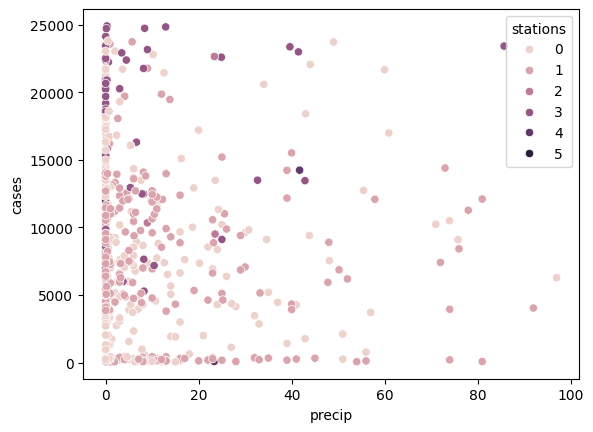

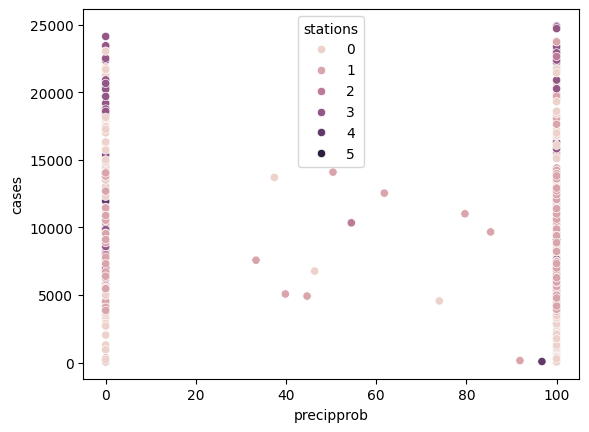

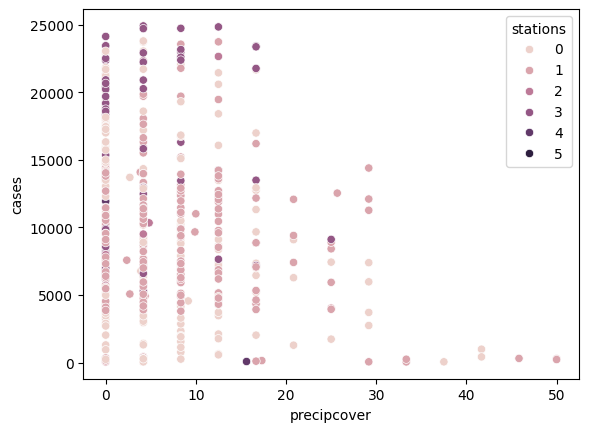

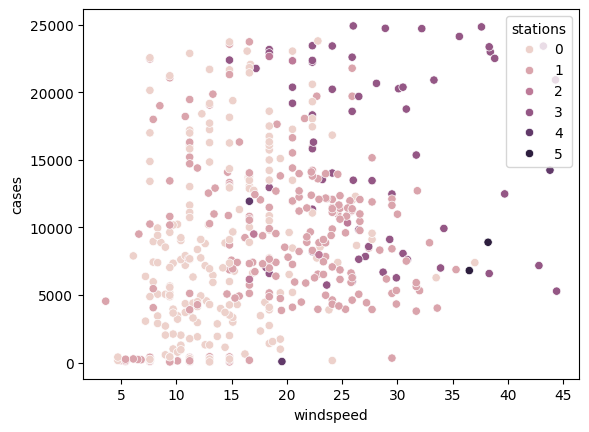

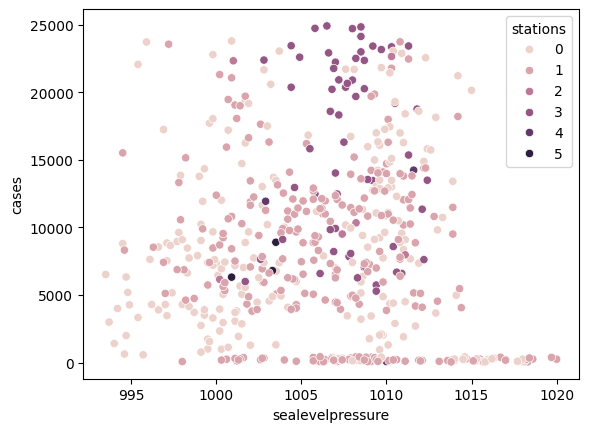

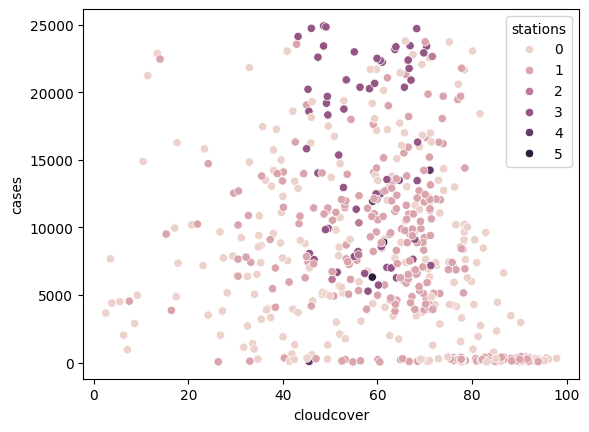

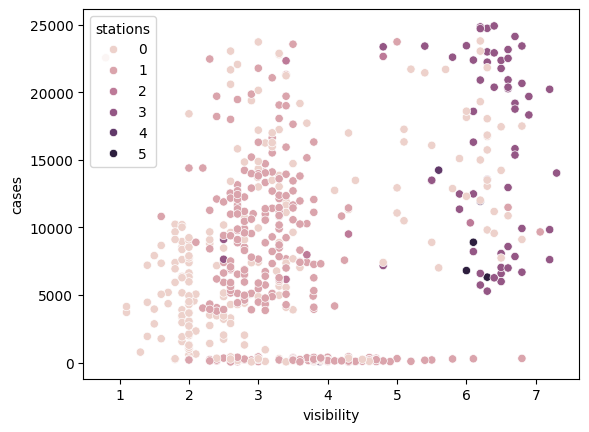

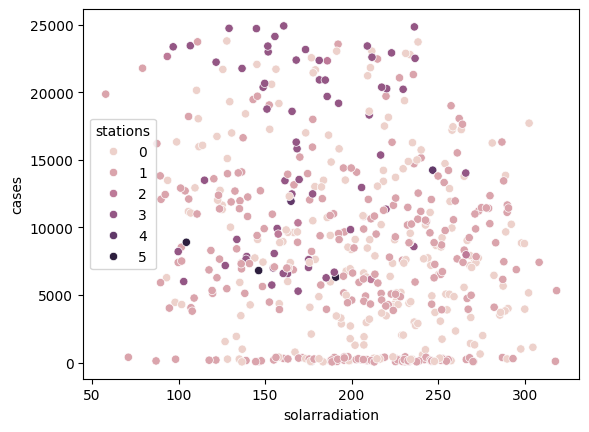

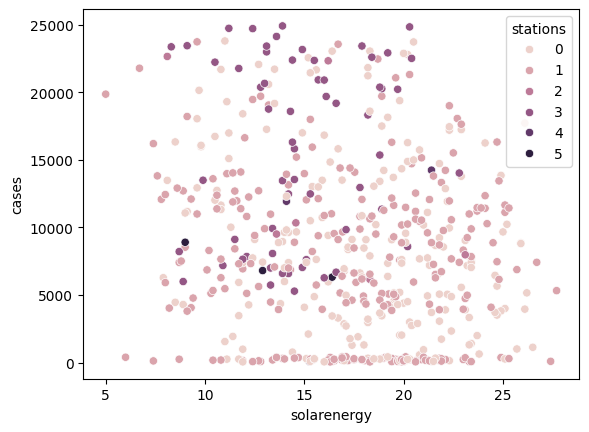

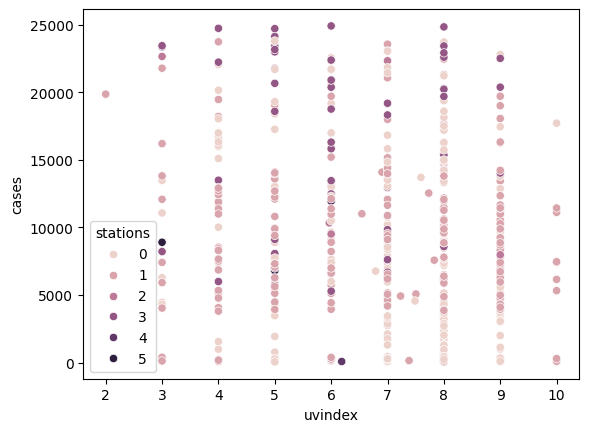

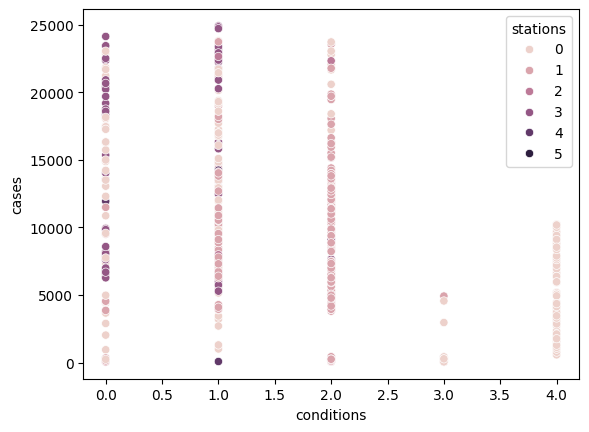

In [191]:
for column in columns:
    sns.scatterplot(x = data[column], y = data['cases'], hue=data['stations'])
    plt.show()
 


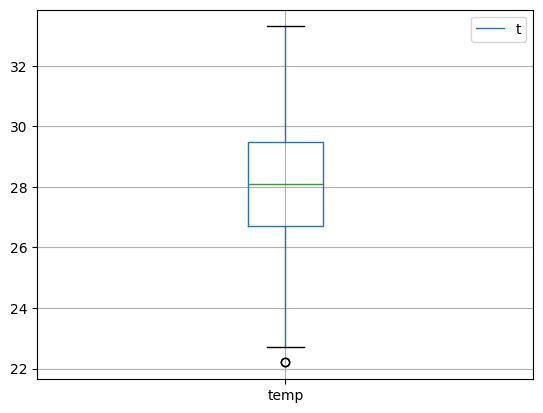

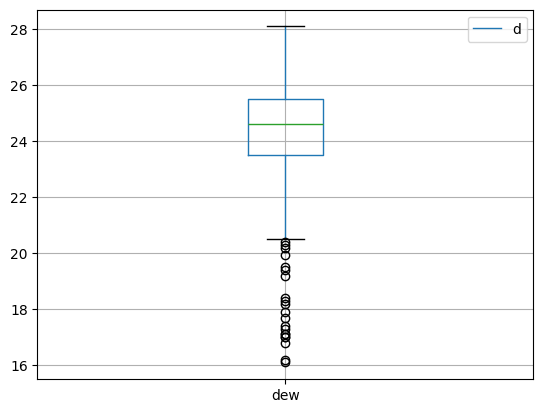

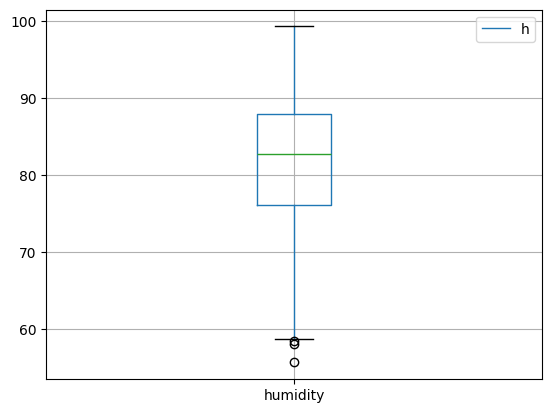

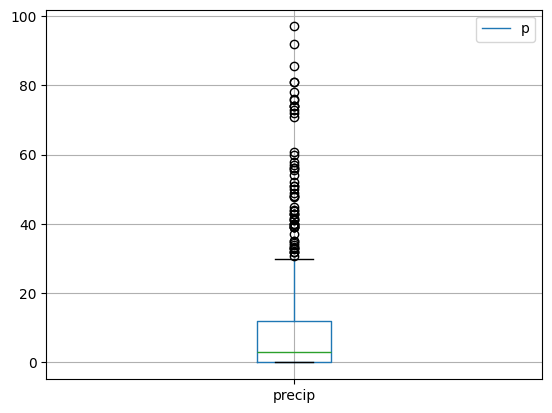

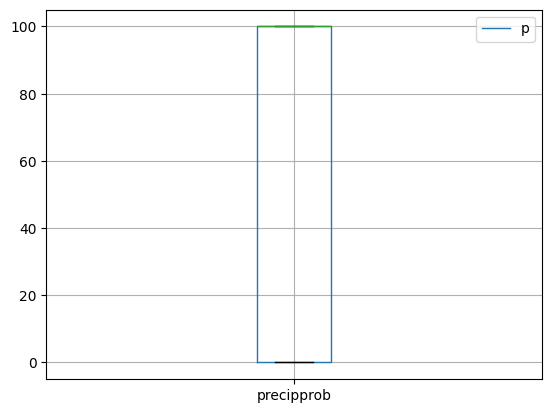

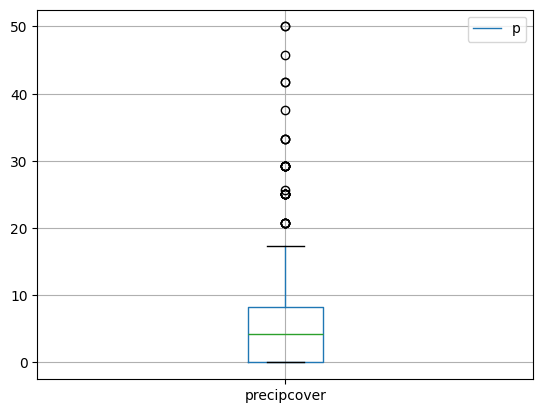

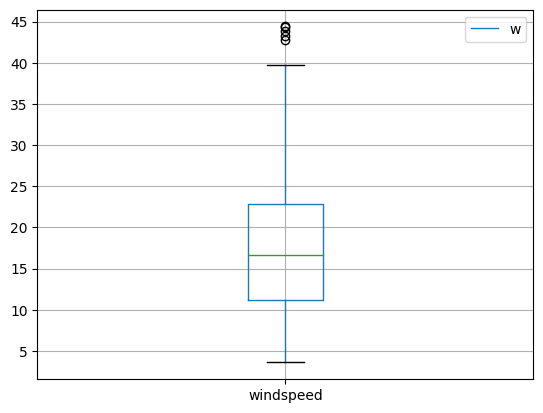

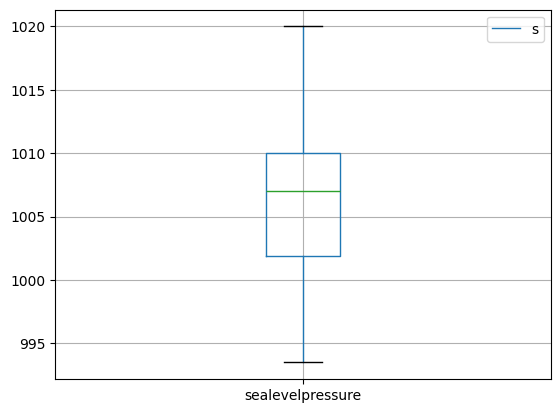

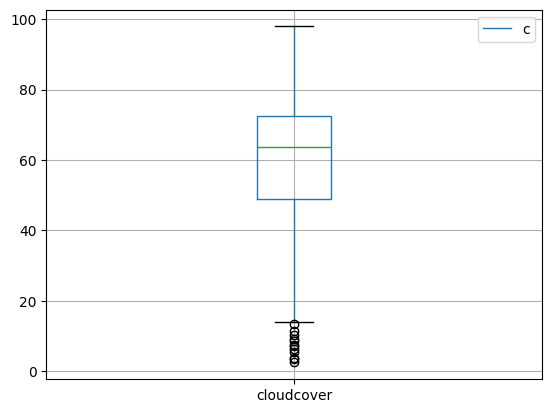

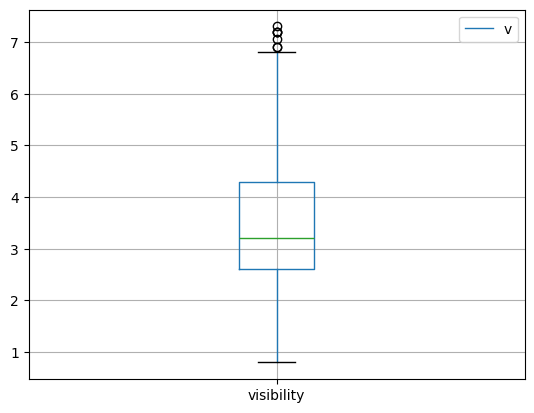

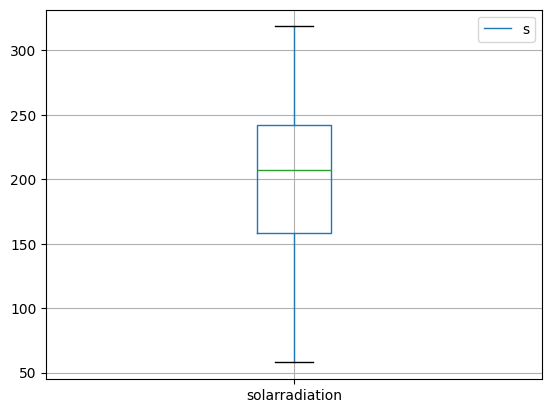

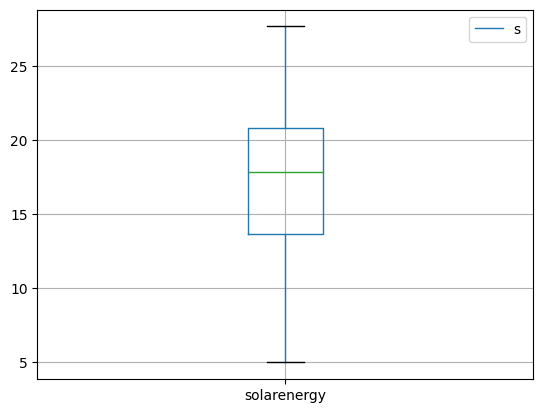

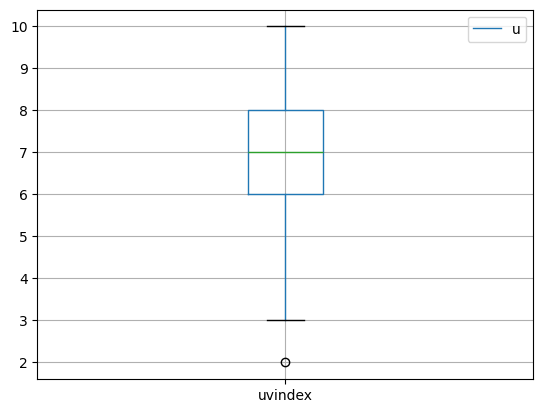

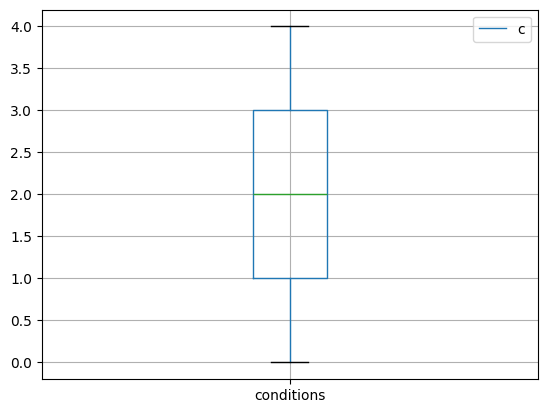

In [192]:
for column in columns:

    data.boxplot(column= column)
    plt.legend(column)
    # plt.
    plt.show()

In [193]:
data #po redukcji odchyleń z 602 wierszy mamy 543 

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,normal
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,normal
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,normal
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,normal
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,28.500,23.300,75.000,0.000,0.000,0.000,17.100,1008.900,50.400,3.100,252.500,21.900,9.000,1,1,6729,normal
598,29.300,22.600,68.500,0.000,0.000,0.000,16.600,1010.400,50.500,3.100,242.700,20.900,8.000,1,1,10541,normal
599,29.800,23.900,71.100,0.000,0.000,0.000,19.000,1010.800,30.500,3.100,195.300,16.900,8.000,1,1,6396,normal
600,30.600,23.300,65.900,0.000,0.000,0.000,14.700,1009.700,32.700,3.300,187.600,16.000,7.000,1,1,10883,normal


In [194]:
# Korekcja Labels granice .25/.75

# dff = pd.get_dummies(data_std_label['labels'])
import numpy as np
# dff.describe()

data['labels'] = \
np.where(data['cases'] < 3000, 'Low', \
np.where(data['cases'] < 13000, 'Medium', 'High')     
         )

# 24910.000000

In [195]:
data

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,Medium
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,Medium
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,Medium
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,High
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,28.500,23.300,75.000,0.000,0.000,0.000,17.100,1008.900,50.400,3.100,252.500,21.900,9.000,1,1,6729,Medium
598,29.300,22.600,68.500,0.000,0.000,0.000,16.600,1010.400,50.500,3.100,242.700,20.900,8.000,1,1,10541,Medium
599,29.800,23.900,71.100,0.000,0.000,0.000,19.000,1010.800,30.500,3.100,195.300,16.900,8.000,1,1,6396,Medium
600,30.600,23.300,65.900,0.000,0.000,0.000,14.700,1009.700,32.700,3.300,187.600,16.000,7.000,1,1,10883,Medium


### Standaryzacja

In [196]:
# Standarize
from sklearn.preprocessing import StandardScaler

df_labels = data['labels']
# iniclalizacja klasy
scaler = StandardScaler()

data_std = pd.DataFrame(scaler.fit_transform(data.drop(columns='labels')), columns = data.drop(columns='labels').columns)

data_std_label = data_std.merge(df_labels,left_index=True, right_index=True, how='inner' )
data_std_label.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0.332829,-0.697733,-0.999145,-0.439844,-0.563562,-0.294595,-0.229241,0.314048,-0.517326,0.123016,0.148483,0.149799,0.206740,0.936860,0.132384,-0.573053,Medium
1,0.680350,-0.429879,-1.172555,-0.389603,-0.670108,-0.511758,-0.369673,-0.502404,-0.644922,-0.482678,0.420975,0.420332,0.359341,0.122916,0.132384,-0.550616,Medium
2,0.709387,-0.901489,-1.490614,-0.431441,-0.813848,-0.555475,-0.318363,-0.092407,-0.261874,0.425528,0.540185,0.538584,0.542348,0.122916,0.132384,-0.181296,Medium
3,0.341125,-1.332974,-1.505777,-0.258777,-0.724010,-0.511758,-0.123948,-0.534846,-0.545634,-0.411735,0.466843,0.470100,0.409457,-0.691028,-0.880076,0.723110,High
4,-0.559019,-0.049464,0.582606,0.751418,0.587644,1.156943,0.263226,0.702604,-0.790236,0.187936,-0.430387,-0.426999,-0.382264,-0.691028,3.169767,-1.287928,Low


In [197]:
data_std.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases
0,0.332829,-0.697733,-0.999145,-0.439844,-0.563562,-0.294595,-0.229241,0.314048,-0.517326,0.123016,0.148483,0.149799,0.206740,0.936860,0.132384,-0.573053
1,0.680350,-0.429879,-1.172555,-0.389603,-0.670108,-0.511758,-0.369673,-0.502404,-0.644922,-0.482678,0.420975,0.420332,0.359341,0.122916,0.132384,-0.550616
2,0.709387,-0.901489,-1.490614,-0.431441,-0.813848,-0.555475,-0.318363,-0.092407,-0.261874,0.425528,0.540185,0.538584,0.542348,0.122916,0.132384,-0.181296
3,0.341125,-1.332974,-1.505777,-0.258777,-0.724010,-0.511758,-0.123948,-0.534846,-0.545634,-0.411735,0.466843,0.470100,0.409457,-0.691028,-0.880076,0.723110
4,-0.559019,-0.049464,0.582606,0.751418,0.587644,1.156943,0.263226,0.702604,-0.790236,0.187936,-0.430387,-0.426999,-0.382264,-0.691028,3.169767,-1.287928


### MinMaxScaler

In [198]:
# from sklearn.preprocessing import MinMaxScaler

# df_labels = data['labels']
# # inicjalizacja klasy
# scaler = MinMaxScaler()

# data_std_1 = pd.DataFrame(scaler.fit_transform(data.drop(columns='labels')), columns=data.drop(columns='labels').columns)

# data_std_label = data_std_1.merge(df_labels, left_index=True, right_index=True, how='inner')
# data_std_label.head()


In [199]:
# data_std_1.head()

# Regresja 

In [200]:
# podział danych na treningowe i testowe


X = data.drop(columns=['cases', 'labels',])
y = data['cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### regresja liniowa

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_train_linear = linear_reg.predict(X_train)
y_pred_test_linear = linear_reg.predict(X_test)

results = {
    'Linear Regression': {
        'MAE (Train)': mean_absolute_error(y_train, y_pred_train_linear),
        'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_linear)),
        'R^2 (Train)': r2_score(y_train, y_pred_train_linear),
        'MAE (Test)': mean_absolute_error(y_test, y_pred_test_linear),
        'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_linear)),
        'R^2 (Test)': r2_score(y_test, y_pred_test_linear)
    }
}


#### regresja Ridge

In [202]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)

results['Ridge Regression'] = {
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_ridge),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),
    'R^2 (Train)': r2_score(y_train, y_pred_train_ridge),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_ridge),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
    'R^2 (Test)': r2_score(y_test, y_pred_test_ridge)
}

#### regresja Lasso

In [203]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)

results['Lasso Regression'] = {
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_lasso),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
    'R^2 (Train)': r2_score(y_train, y_pred_train_lasso),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_lasso),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
    'R^2 (Test)': r2_score(y_test, y_pred_test_lasso)
}


C:\Users\Ja\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.410e+09, tolerance: 2.120e+06
  model = cd_fast.enet_coordinate_descent(


### regresja wielomianowa

In [204]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

results['Polynomial Regression'] = {
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_poly),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_poly)),
    'R^2 (Train)': r2_score(y_train, y_pred_train_poly),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_poly),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_poly)),
    'R^2 (Test)': r2_score(y_test, y_pred_test_poly)
}


In [205]:
# results

### regresja ANN

Epoch 1/500


C:\Users\Ja\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 133990632.0000 - val_loss: 92185456.0000
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115425320.0000 - val_loss: 79699752.0000
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104453624.0000 - val_loss: 55826656.0000
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78880072.0000 - val_loss: 34363692.0000
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56306264.0000 - val_loss: 37906456.0000
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49846952.0000 - val_loss: 34335832.0000
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49495252.0000 - val_loss: 34130760.0000
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49670376.0000 - val_loss: 34588944.0000
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49562208.0000 - val_loss: 34247912.0000
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47096836.0000 - val_loss: 34522888.0000
Epoch 11/500
14/1

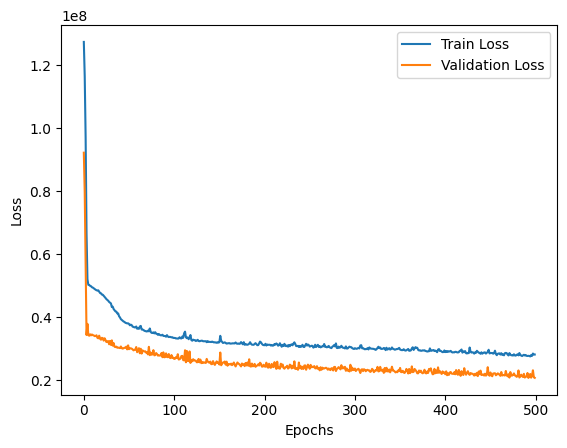

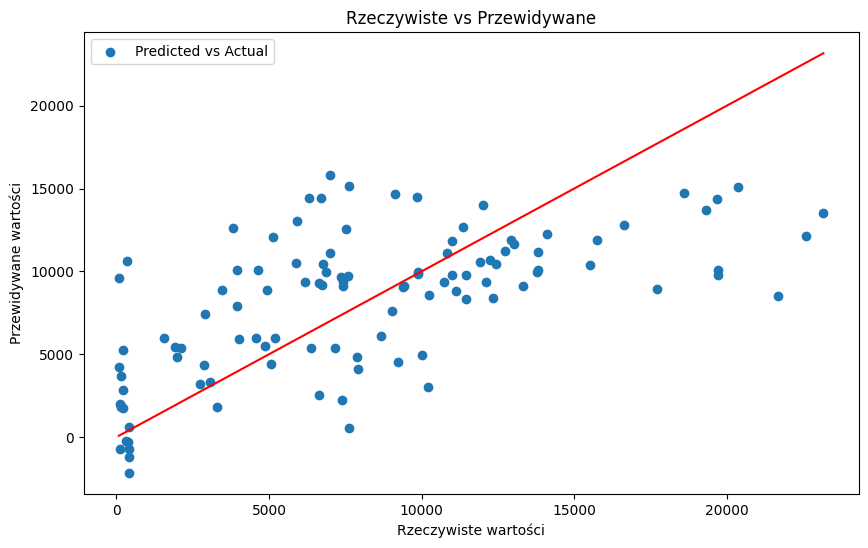

In [206]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Warstwa wyjściowa, jedna jednostka wyjściowa dla regresji
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error'
)

#trening modelu
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    verbose=1
)
y_pred_train_ann = model.predict(X_train).flatten()
y_pred_test_ann = model.predict(X_test).flatten()

results['Artificial Neural Network'] = {
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_ann),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_ann)),
    'R^2 (Train)': r2_score(y_train, y_pred_train_ann),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_ann),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_ann)),
    'R^2 (Test)': r2_score(y_test, y_pred_test_ann)
}


# Wykres funkcji kosztu
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Wykres przewidywanych vs rzeczywistych wartości
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_ann, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Idealna linia
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane')
plt.legend()
plt.show()

# # R2 dla ANN

# # Obliczanie SS_res i SS_tot
# ss_res = np.sum((y_test - y_pred) ** 2)
# ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)

# r2 = 1 - (ss_res / ss_tot)
# print(f"R^2 (Test): {r2}")

### Analiza regresji

In [207]:
results

{'Linear Regression': {'MAE (Train)': 4392.284483913523,
  'RMSE (Train)': 5427.736006746285,
  'R^2 (Train)': 0.3968247960166543,
  'MAE (Test)': 3808.7109569448994,
  'RMSE (Test)': 4859.1504695736885,
  'R^2 (Test)': 0.29603665276138114},
 'Ridge Regression': {'MAE (Train)': 4398.47547235156,
  'RMSE (Train)': 5428.401615077253,
  'R^2 (Train)': 0.39667685106975814,
  'MAE (Test)': 3816.087216118261,
  'RMSE (Test)': 4860.913498361242,
  'R^2 (Test)': 0.2955257269080913},
 'Lasso Regression': {'MAE (Train)': 4415.160886294756,
  'RMSE (Train)': 5435.075891069175,
  'R^2 (Train)': 0.39519235491179217,
  'MAE (Test)': 3845.1558889085063,
  'RMSE (Test)': 4873.365849420335,
  'R^2 (Test)': 0.2919117571567099},
 'Polynomial Regression': {'MAE (Train)': 3829.0333448840724,
  'RMSE (Train)': 4844.937636745819,
  'R^2 (Train)': 0.5194014794777819,
  'MAE (Test)': 4538.631818018922,
  'RMSE (Test)': 5763.702964934973,
  'R^2 (Test)': 0.009550049857517173},
 'Artificial Neural Network': {'MA

In [208]:
results_df = pd.DataFrame(results).T
results_df.columns = ['MAE (Train)', 'RMSE (Train)', 'R^2 (Train)', 'MAE (Test)', 'RMSE (Test)', 'R^2 (Test)']
print(results_df)

                           MAE (Train)  RMSE (Train)  R^2 (Train)  \
Linear Regression          4392.284484   5427.736007     0.396825   
Ridge Regression           4398.475472   5428.401615     0.396677   
Lasso Regression           4415.160886   5435.075891     0.395192   
Polynomial Regression      3829.033345   4844.937637     0.519401   
Artificial Neural Network  4138.588028   5265.511505     0.432341   

                            MAE (Test)  RMSE (Test)  R^2 (Test)  
Linear Regression          3808.710957  4859.150470    0.296037  
Ridge Regression           3816.087216  4860.913498    0.295526  
Lasso Regression           3845.155889  4873.365849    0.291912  
Polynomial Regression      4538.631818  5763.702965    0.009550  
Artificial Neural Network  3615.593744  4558.510376    0.380452  


<!-- * Regresja liniowa: Wyniki pokazują, że model radzi sobie dobrze zarówno na zbiorze treningowym, jak i testowym, co sugeruje, że model nie jest nadmiernie dopasowany (overfitting). <br>
* Regresja Ridge: Ten model może radzić sobie lepiej, może prowadzić do stabilniejszych wyników, co widać w nieco lepszym R^2 na zbiorze testowym. <br>
* Lasso Regression: Wysokie wartości błędów oraz niskie R^2 sugerują, że model jest nadmiernie uproszczony, co prowadzi do odrzucenia wielu istotnych cech. -->

<!-- W tym przypadku **<font color='yellow'>regresja Ridge</font>** może być najodpowiedniejszym wyborem ze względu na najlepszą równowagę między dokładnością na zbiorze treningowym i testowym. -->

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


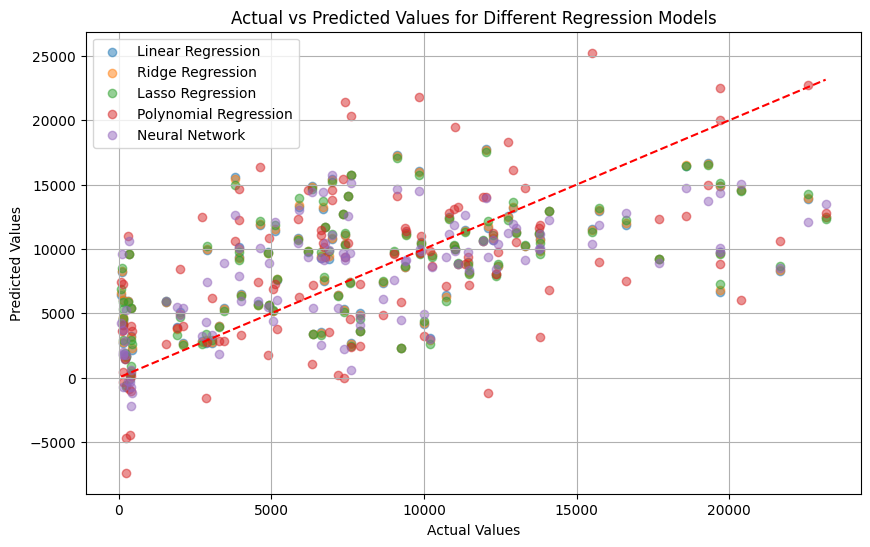

In [209]:
# Przewidywania dla każdej regresji
y_pred_test_linear = linear_reg.predict(X_test)
y_pred_test_ridge = ridge_reg.predict(X_test)
y_pred_test_lasso = lasso_reg.predict(X_test)
y_pred_test_poly = poly_reg.predict(X_test_poly)
y_pred_test_ann = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))

# Wykresy rozrzutu dla każdej regresji
plt.scatter(y_test, y_pred_test_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_test_ridge, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, y_pred_test_lasso, label='Lasso Regression', alpha=0.5)
plt.scatter(y_test, y_pred_test_poly, label='Polynomial Regression', alpha=0.5)
plt.scatter(y_test, y_pred_test_ann, label='Neural Network', alpha=0.5)

# Linia idealna (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Ustawienia wykresu
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Regression Models')
plt.legend()
plt.grid(True)
plt.show()

Analiza wyników:

Rozrzut punktów wokół linii: Im bliżej punkty są tej czerwonej linii, tym lepiej dany model przewiduje rzeczywiste wartości.
Modele mają różne dopasowanie: Na przykład, fioletowe punkty (sztuczna sieć neuronowa) mają duży rozrzut w porównaniu do innych modeli, co sugeruje, że ten model nie jest dobrze dopasowany do danych.
Regresja liniowa, grzbietowa i Lasso: Niebieskie, pomarańczowe i zielone punkty wydają się być bliżej czerwonej linii niż pozostałe, co sugeruje, że te modele mogą być lepiej dopasowane niż regresja wielomianowa i sieć neuronowa.
Zakres wartości:

Widać, że przewidywane wartości osiągają wyższe wartości niż rzeczywiste w przypadku niektórych modeli, szczególnie przy większych wartościach rzeczywistych. Może to wskazywać na tendencję do przewidywania zbyt wysokich wartości przez te modele dla dużych wartości wejściowych.

## Models - Klasyfikacja + RandomForest

In [210]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.linear_model import LinearRegression as LM
from sklearn.model_selection import train_test_split as TTS


In [211]:
X = data.drop(['cases','labels'],axis=1) # zalezne
y = data['labels'] # wynik

X_train, X_test, y_train, y_test = TTS(X,y,test_size=0.2,stratify=y, random_state=42)


In [212]:
#Klasyfikacja
cls = LinearSVC()
cls.fit(X_train,y_train)

cls.score(X_test,y_test) # 98.61751152073732% ????

0.6697247706422018

In [213]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf.score(X_test,y_test) # 99.53917050691244% ????

0.6788990825688074

In [214]:
#uzywamy modelu do przewidzenia nowych wartosci
y_pred_cls = cls.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [215]:
data.labels.unique().tolist()

['Medium', 'High', 'Low']

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#  LinearSVC
print("LinearSVC Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_cls))
print("Precision:", precision_score(y_test, y_pred_cls, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_cls, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_cls, average='weighted'))

# RandomForestClassifier
print("\nRandomForestClassifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# # classification_report
# print("\nClassification Report for LinearSVC:")
# print(classification_report(y_test, y_pred_cls, target_names=data.labels))

# print("Classification Report for RandomForestClassifier:")
# print(classification_report(y_test, y_pred_rf, target_names=data.labels))

LinearSVC Metrics:
Accuracy: 0.6697247706422018
Precision: 0.6890615237907336
Recall: 0.6697247706422018
F1-Score: 0.6738524847307026

RandomForestClassifier Metrics:
Accuracy: 0.6788990825688074
Precision: 0.7065551938443326
Recall: 0.6788990825688074
F1-Score: 0.6866464931030899


## ANN Klasyfikacja

In [217]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
from matplotlib import pyplot as plt

In [218]:
# one-hot enc
# data = pd.get_dummies(data, columns=['labels'], drop_first=True)

In [219]:
data.head()

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,28.710,22.971,73.508,2.922,44.658,4.361,15.678,1007.912,50.748,3.790,208.098,17.974,7.233,3,1,4925,Medium
1,29.464,23.485,72.067,3.783,39.837,2.677,14.575,1003.533,48.314,2.885,222.926,19.246,7.504,2,1,5077,Medium
2,29.527,22.580,69.424,3.066,33.333,2.338,14.978,1005.732,55.621,4.242,229.413,19.802,7.829,2,1,7579,Medium
3,28.728,21.752,69.298,6.025,37.398,2.677,16.505,1003.359,50.208,2.991,225.422,19.480,7.593,1,0,13706,High
4,26.775,24.215,86.652,23.337,96.748,15.617,19.546,1009.996,45.542,3.887,176.598,15.262,6.187,1,4,82,Low


In [220]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [306]:
X = data_std.drop(columns='cases')  # The first 10 columns as features
y = data['labels']  # The 11th column as target

In [307]:
X

,temp,dew,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations
0,0.332829,-0.697733,-0.999145,-0.439844,-0.563562,-0.294595,-0.229241,0.314048,-0.517326,0.123016,0.148483,0.149799,0.206740,0.936860,0.132384
1,0.680350,-0.429879,-1.172555,-0.389603,-0.670108,-0.511758,-0.369673,-0.502404,-0.644922,-0.482678,0.420975,0.420332,0.359341,0.122916,0.132384
2,0.709387,-0.901489,-1.490614,-0.431441,-0.813848,-0.555475,-0.318363,-0.092407,-0.261874,0.425528,0.540185,0.538584,0.542348,0.122916,0.132384
3,0.341125,-1.332974,-1.505777,-0.258777,-0.724010,-0.511758,-0.123948,-0.534846,-0.545634,-0.411735,0.466843,0.470100,0.409457,-0.691028,-0.880076
4,-0.559019,-0.049464,0.582606,0.751418,0.587644,1.156943,0.263226,0.702604,-0.790236,0.187936,-0.430387,-0.426999,-0.382264,-0.691028,3.169767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.236039,-0.526285,-0.819597,-0.610349,-1.550519,-0.856976,-0.048194,0.498258,-0.535569,-0.338784,0.964451,0.984794,1.201740,-0.691028,0.132384
539,0.604762,-0.891067,-1.601809,-0.610349,-1.550519,-0.856976,-0.111853,0.777929,-0.530327,-0.338784,0.784358,0.772111,0.638639,-0.691028,0.132384
540,0.835214,-0.213616,-1.288924,-0.610349,-1.550519,-0.856976,0.193711,0.852508,-1.578768,-0.338784,-0.086704,-0.078624,0.638639,-0.691028,0.132384
541,1.203936,-0.526285,-1.914693,-0.610349,-1.550519,-0.856976,-0.353758,0.647416,-1.463440,-0.204929,-0.228205,-0.270039,0.075537,-0.691028,0.132384


In [308]:
y

0      Medium
1      Medium
2      Medium
3        High
4         Low
        ...  
597    Medium
598    Medium
599    Medium
600    Medium
601    Medium
Name: labels, Length: 543, dtype: object

In [309]:
# Encode the categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot encoding
y_one_hot = to_categorical(y_encoded)


In [310]:
y_encoded

array([2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,

In [311]:
y_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [312]:
# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)
# Normalize features
# # Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train, y_train

In [313]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([868, 434], dtype=int64))

In [314]:
X_train.shape[1] ## wiersz po 16 kolumn na wejsciu

15

In [315]:
y_train #.shape[1] ## wiersz po 3 kolumn na wyjsciu

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [316]:
def def_init_model_and_layers(hidden_units: list, hidden_act_fn: str, out_units: int, loss: str, adam_value: float ,epochs: int,verbose: bool):
    '''
    hidden_units - lista z wartwami
    out_units - wyjscie
    loss - typ bledu

    OPTIMISER: ADAM
    OUTPUT_FN = softmax

    '''
    global model
    model = tf.keras.Sequential()

    # Input layer
    model.add(tf.keras.layers.InputLayer(shape=(X_train.shape[1],),activation="relu"))

    # Hidden layers (customize as needed)
    for unit in hidden_units:
        model.add(tf.keras.layers.Dense(units=unit, activation=hidden_act_fn))
    
    # Output layer with 2 units (since your output is 3 columns)
    model.add(tf.keras.layers.Dense(units=out_units, activation='softmax'))

    model.compile(
    # loss='binary_crossentropy',
    # loss='sparse_categorical_crossentropy',categorical_crossentropy
    loss = loss,
    optimizer=tf.keras.optimizers.Adam(adam_value),
    metrics=['accuracy']
    )

    global history
    history = model.fit(
    X_train,  # training set, features
    y_train,  # training set, target variable
    validation_data=(X_test, y_test),  # validation data
    # batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    )

    model.summary()

    # plot_error()
    # plot_accuracy()



def evaluate_model():
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_accuracy:.4f} \nTest_loss: {test_loss:.4f}')

In [317]:
hidden_units = [64,64,16]

def_init_model_and_layers(hidden_units,'relu',3,'categorical_crossentropy',0.1,300,False)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,827 (73.55 KB)

 Trainable params: 6,275 (24.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,552 (49.04 KB)

In [318]:
print(model)
evaluate_model()

<Sequential name=sequential_11, built=True>
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5927 - loss: 1.9303  
Test accuracy: 0.5780 
Test_loss: 2.0611


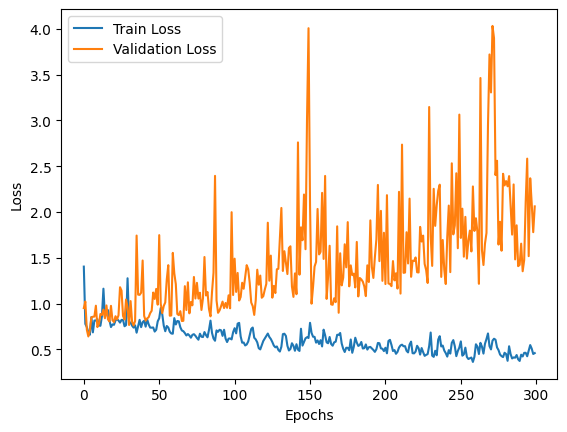

In [319]:
# Wykres funkcji kosztu
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [320]:
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [321]:
y_pred_classes

array([0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2,
       1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1,
       2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2],
      dtype=int64)

In [322]:
y_true_classes

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 0],
      dtype=int64)

In [323]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Precision: 0.6001
Recall: 0.5780
F1-Score: 0.5722

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.52      0.44        27
           1       0.68      0.92      0.78        25
           2       0.67      0.46      0.54        57

    accuracy                           0.58       109
   macro avg       0.58      0.63      0.59       109
weighted avg       0.60      0.58      0.57       109



## Analiza wyników ANN klasyfikacji:

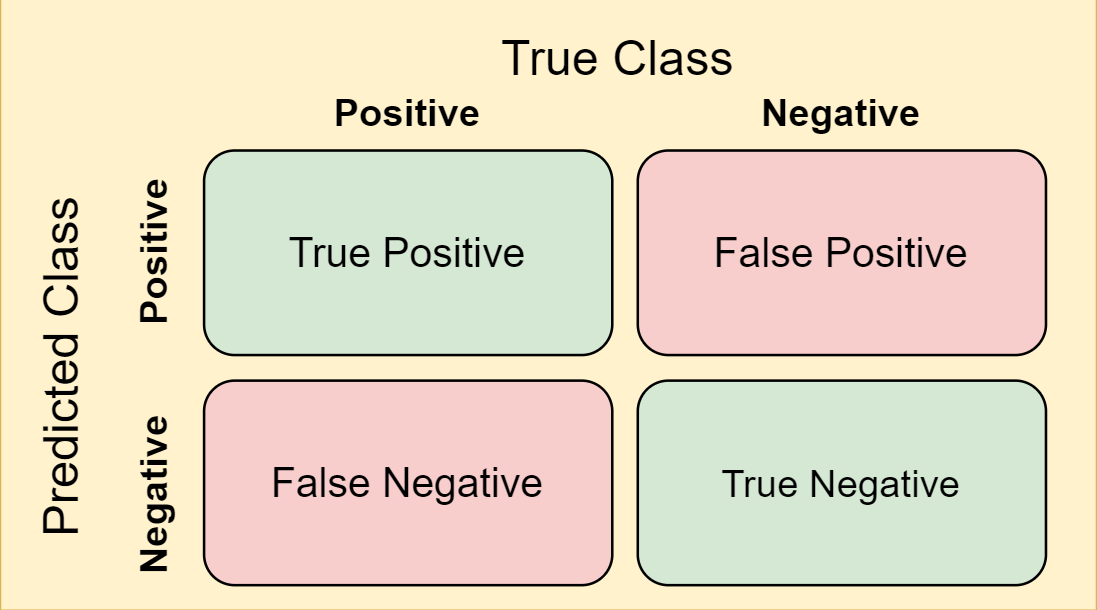

ANN uzyskała

Precision = TP/(TP + FP): 
Precision: 0.6001 - precyzja 60%, zdolnosc do unikania False Pusitives. Nalezy dazyc do 1 (100%)

Recall = TP/(TP + FN): 
Recall: 0.5780 - 59%, zdolnosc do unikania False Negatives. Nalezy dazyc do 1 (100%)

Accuracy = (TP + TN)/(TP + TN + FP + FN): 
Accuracy  0.58 - 58%, zdolnosc do poprawnego zaklasufikowania w odniesieniu do wszystkich przypadkow. Nalezy dazyc do 1 (100%)

F1 = 2 * (Precision * Recall) / (Precision + Recall): 

F1-Score: 0.5722 - 57 %

Classification Report:


|        Klasy      | precision  |  recall | f1-score  | support |
|--- |---|---|---|--- |
|            0 |      0.39  |    0.52 |     0.44  |      27 |
|            1 |      0.68  |    0.92 |     0.78  |      25 |
|            2 |      0.67  |    0.46 |     0.54  |      57 |
||
|     accuracy |            |         |     0.58  |     109 |
|    macro avg |      0.58  |    0.63 |     0.59  |     109 |
| weighted avg |      0.60  |    0.58 |     0.57  |     109 |


Model mozna jeszcze dopracowac, zyskal obecnie sprawdzalnosc nieco wyzsza od losowosci. Niewykluczone ze powrot do EDA i wzbogacenie danych poprawi wynik.
Dane w ilosci ~550*20% wierszy moga byc niewystarczajace do osiagniecia dobrych metryk. W przypadku ANN mozliwy jest rowniez dalszy tuning warst ukrytych i hiperparametrow. Nalezy jednak pamietac aby nie przetrenowac modelu.